<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introCV_Experis2020/blob/main/DL4CV_1_Introduction_to_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](images/intro.jpg)

# **Welcome!**

## Introduction to Machine Learning for Computer Vision



## **Lecturer :** Matteo Alberti

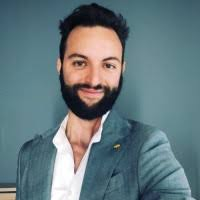

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary

- <font color=BE3315>**Load Data** </font> 

- <font color=C24024>**Define HyperParameters** </font> 

- <font color=E35F2A>**KERAS Models : Sequential vs Functional** </font> 

- <font color=EF8932>**MLP | Train and Test** </font>


#### Load Packages

**Allocare resources! GPUs**

In [22]:
import os
import pickle
import pandas as pd
import argparse
from random import randint
import time
import gc
import cv2
import platform
import numpy as np
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 

#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

#Sklearn ML
from sklearn.model_selection import train_test_split
from skimage.transform import resize

#Keras Imports
from keras import backend as K
import tensorflow as tf
import keras
from keras.initializers import he_normal
from keras import optimizers
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.models import load_model
from keras.layers import Input,add, AveragePooling2D, GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Conv2DTranspose
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import Adam , SGD
from keras import optimizers, regularizers
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from tqdm import tqdm_notebook


import sklearn.model_selection as model_selection


import warnings
warnings.filterwarnings("ignore")

print('Keras Version : ',keras.__version__)
print('TF Version : ',tf.__version__)
print('Python Version : ', platform.python_version())

Keras Version :  2.4.3
TF Version :  2.3.0
Python Version :  3.6.9


### Load Cifar10 dataset


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


##### Split out Data

*We don't need it, why? let's see . . .*

##### Normalize data

In [5]:
#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255

y_train = np_utils.to_categorical(y_train, 10) # same as tf.keras.utils.to_categorical
y_test = np_utils.to_categorical(y_test, 10)

### Define HyperParameters & CNN Architecture
   

In [6]:
#Parameters
import sys;import argparse; sys.argv=['']; del sys
parser = argparse.ArgumentParser(description="CNN")
parser.add_argument('--epochs', default=20, type=int)
parser.add_argument('--iter', default=100, type=int)
parser.add_argument('--batch_size', default=128, type=int)
parser.add_argument('--lr', default=0.001, type=float)

parser.add_argument('--height', default=32, type=int)
parser.add_argument('--width', default=32, type=int)
parser.add_argument('--channel', default=3, type=int)
parser.add_argument('--classes', default=10, type=int)

args = parser.parse_args()

print(args)

Namespace(batch_size=128, channel=3, classes=10, epochs=20, height=32, iter=100, lr=0.001, width=32)


## Keras Models: Sequential vs. Functional API

- The **sequential** API allows you to create models layer-by-layer
- The **functional** API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers

In [7]:
x_train = x_train.reshape(x_train.shape[0], 32*32*3)

x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1]*x_test.shape[2]*x_test.shape[3])


print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 3072) (5000, 3072) (50000, 10) (5000, 10)


### KERAS SEQUENTIAL API

In [8]:
# SEQUENTIAL

model = Sequential()
model.add(Dense(512, activation='relu', 
                input_shape=(args.height*args.width*args.channel,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [9]:
start = time.time()
mlp_baseline = model.fit(x_train, y_train, batch_size=64,epochs=10,verbose=2, validation_split=0.2)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/10
625/625 - 3s - loss: 2.1476 - accuracy: 0.2222 - val_loss: 2.0454 - val_accuracy: 0.2825
Epoch 2/10
625/625 - 3s - loss: 1.9967 - accuracy: 0.3003 - val_loss: 1.9626 - val_accuracy: 0.3166
Epoch 3/10
625/625 - 3s - loss: 1.9340 - accuracy: 0.3271 - val_loss: 1.9177 - val_accuracy: 0.3303
Epoch 4/10
625/625 - 3s - loss: 1.8934 - accuracy: 0.3451 - val_loss: 1.8924 - val_accuracy: 0.3451
Epoch 5/10
625/625 - 3s - loss: 1.8639 - accuracy: 0.3553 - val_loss: 1.8655 - val_accuracy: 0.3533
Epoch 6/10
625/625 - 3s - loss: 1.8409 - accuracy: 0.3649 - val_loss: 1.8480 - val_accuracy: 0.3536
Epoch 7/10
625/625 - 3s - loss: 1.8215 - accuracy: 0.3722 - val_loss: 1.8318 - val_accuracy: 0.3669
Epoch 8/10
625/625 - 3s - loss: 1.8055 - accuracy: 0.3795 - val_loss: 1.8195 - val_accuracy: 0.3717
Epoch 9/10
625/625 - 3s - loss: 1.7914 - accuracy: 0.3830 - val_loss: 1.8108 - val_accuracy: 0.3739
Epoch 10/10
625/625 - 3s - loss: 1.7785 - accuracy: 0.3896 - val_loss: 1.7958 - val_accuracy: 0.3794

In [13]:
mlp_baseline.history

{'accuracy': [0.22220000624656677,
  0.3003250062465668,
  0.32712501287460327,
  0.34505000710487366,
  0.35534998774528503,
  0.36492499709129333,
  0.3721500039100647,
  0.37950000166893005,
  0.38304999470710754,
  0.38964998722076416],
 'loss': [2.1475608348846436,
  1.9966695308685303,
  1.9340342283248901,
  1.8933855295181274,
  1.863879919052124,
  1.8409475088119507,
  1.8215253353118896,
  1.8055140972137451,
  1.791351556777954,
  1.7784759998321533],
 'val_accuracy': [0.2824999988079071,
  0.3165999948978424,
  0.3303000032901764,
  0.3450999855995178,
  0.353300005197525,
  0.35359999537467957,
  0.3668999969959259,
  0.3716999888420105,
  0.37389999628067017,
  0.37940001487731934],
 'val_loss': [2.0453619956970215,
  1.962634563446045,
  1.917722463607788,
  1.892385721206665,
  1.8654791116714478,
  1.8480056524276733,
  1.8317742347717285,
  1.8195421695709229,
  1.8107837438583374,
  1.795793890953064]}

In [16]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

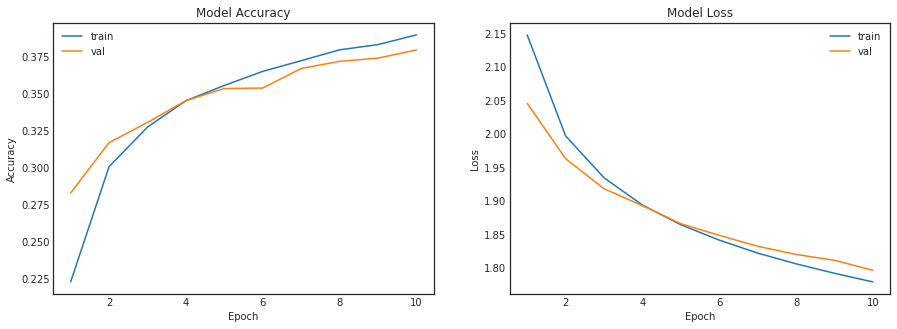

In [17]:
plot_model_history(mlp_baseline)

### How appears our training history?

![](./images/underfit.png)

In [18]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" %
                     (i, loss[i], acc[i], val_loss[i], val_acc[i]))

save_history(mlp_baseline, 'history.txt')

In [20]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)

Test loss: 1.7873324155807495
Test acc: 0.3864000141620636


In [ ]:
# save model locally!

#mlp_baseline.save('./pretrained_model/mlp_baseline.h5')

### KERAS FUNCTIONAL API

In [21]:
_inputs = Input(shape=(args.height*args.width*args.channel,))
hidden = Dense(512, activation='relu')(_inputs)
_output = Dense(10, activation='softmax')(hidden)
model = Model(inputs=_inputs, outputs=_output)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


### Which are the next steps?

*Are you able to take the above code and re-train our mlp?*